In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import CMR_IA as cmr
import scipy as sp

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = True

## Load Stimuli and Semantic Matrix

In [23]:
with open("simu5_data/simu5_design.pkl", "rb") as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 100]  # for testing
# df_test = df_test.loc[df_test.session < 100]  # for testing

In [24]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,1071,857,PIMPLE,MAILBOX,0,0
1,309,1029,CIGARETTE,PAW,0,0
2,624,700,GARLIC,HEEL,0,0
3,195,1389,BULLETIN,STRANGER,0,0
4,580,392,FLIPPER,COUSIN,0,0
...,...,...,...,...,...,...
467995,1281,1100,SHELL,POLYESTER,77,999
467996,1511,421,TROUT,CUCUMBER,77,999
467997,1269,640,SERGEANT,GLASSES,77,999
467998,1495,1017,TRAITOR,PARTNER,77,999


In [25]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session
0,580,FLIPPER,392,1,0,0
1,744,IRON,245,3,1,0
2,316,CLAMP,958,5,2,0
3,109,BEAVER,1326,2,3,0
4,768,KANGAROO,1632,0,4,0
...,...,...,...,...,...,...
77995,129,BIRD,67,4,73,999
77996,616,FURNITURE,1451,5,74,999
77997,1082,PLANET,344,4,75,999
77998,100,BATHTUB,192,5,76,999


In [26]:
s_mat = np.load("../wordpools/ltp_FR_similarity_matrix.npy")

## Run CMR-IA

In [27]:
# define parameters
params = cmr.make_default_params()
params.update(
    beta_enc=0.60,
    beta_cue=0.60,
    beta_distract=0.1,
    beta_rec_post=0.99,
    gamma_fc=0.8,
    gamma_cf=0.5,
    s_fc=0.1,
    s_cf=0.1,
    c_thresh=0.01,
    kappa=0.08,
    lamb=0.05,
    eta=0.02,
    phi_s=0.4,
    phi_d=1.45,
    nitems_in_accumulator=48,
    alpha=0.5,
    use_new_context=True,
)
params

{'beta_enc': 0.6,
 'beta_rec': 0.5,
 'beta_cue': 0.6,
 'beta_rec_post': 0.99,
 'beta_distract': 0.1,
 'phi_s': 0.4,
 'phi_d': 1.45,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 0.5,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.8,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [28]:
# run CMR-IA
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params, df_study, df_test, s_mat)
df_simu

CMR2 Time: 4233.021398067474


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,580,1605.0,1420.0,0.887542
1,1,0,744,245.0,2510.0,0.870246
2,2,0,316,1583.0,2120.0,0.797534
3,3,0,109,1326.0,2880.0,0.900244
4,4,0,768,1632.0,2050.0,0.967616
...,...,...,...,...,...,...
77995,73,999,129,67.0,3970.0,0.852012
77996,74,999,616,119.0,3680.0,0.741838
77997,75,999,1082,-1.0,-1.0,-1.000000
77998,76,999,100,688.0,4300.0,0.819364


In [29]:
# merge to get more info
df_simu = df_simu.merge(df_test, on=["session", "test_itemno"])
df_simu["correct"] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct
0,0,0,580,1605.0,1420.0,0.887542,FLIPPER,392,1,0,False
1,1,0,744,245.0,2510.0,0.870246,IRON,245,3,1,True
2,2,0,316,1583.0,2120.0,0.797534,CLAMP,958,5,2,False
3,3,0,109,1326.0,2880.0,0.900244,BEAVER,1326,2,3,True
4,4,0,768,1632.0,2050.0,0.967616,KANGAROO,1632,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...
77995,73,999,129,67.0,3970.0,0.852012,BIRD,67,4,73,True
77996,74,999,616,119.0,3680.0,0.741838,FURNITURE,1451,5,74,False
77997,75,999,1082,-1.0,-1.0,-1.000000,PLANET,344,4,75,False
77998,76,999,100,688.0,4300.0,0.819364,BATHTUB,192,5,76,False


In [30]:
# merge f_in info, for testing
sessions = df_simu.session.to_numpy()
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)

    this_df = df_simu.query(f"session=={sess}")
    testid = np.searchsorted(tmp, this_df.test_itemno)
    corrid = np.searchsorted(tmp, this_df.correct_ans)

    df_simu.loc[df_simu.session == sess, "corr_fin"] = [f_dif[sess][l][i] for l, i in enumerate(corrid)]
    df_simu.loc[df_simu.session == sess, "omax_fin"] = [np.delete(f_dif[sess][l], i).max() for l, i in enumerate(corrid)]

df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct,corr_fin,omax_fin
0,0,0,580,1605.0,1420.0,0.887542,FLIPPER,392,1,0,False,-0.232029,-0.270197
1,1,0,744,245.0,2510.0,0.870246,IRON,245,3,1,True,-0.319075,-0.307417
2,2,0,316,1583.0,2120.0,0.797534,CLAMP,958,5,2,False,-0.417943,-0.318968
3,3,0,109,1326.0,2880.0,0.900244,BEAVER,1326,2,3,True,-0.311040,-0.261474
4,4,0,768,1632.0,2050.0,0.967616,KANGAROO,1632,0,4,True,-0.209064,-0.381908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,73,999,129,67.0,3970.0,0.852012,BIRD,67,4,73,True,-0.280227,-0.323287
77996,74,999,616,119.0,3680.0,0.741838,FURNITURE,1451,5,74,False,-0.334681,-0.277235
77997,75,999,1082,-1.0,-1.0,-1.000000,PLANET,344,4,75,False,-0.301279,-0.282124
77998,76,999,100,688.0,4300.0,0.819364,BATHTUB,192,5,76,False,-0.273925,-0.318763


In [31]:
df_simu.to_pickle("simu5_data/simu5_result.pkl")

## Analysis

In [32]:
with open("simu5_data/simu5_result.pkl", "rb") as inp:
    df_simu = pickle.load(inp)

### f_IN

In [33]:
df_fin = df_simu.groupby("lag")[["corr_fin", "omax_fin"]].mean().reset_index()
df_fin["dif"] = df_fin["corr_fin"] - df_fin["omax_fin"]
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.203279,-0.354686,0.151407
1,1,-0.238977,-0.294046,0.055069
2,2,-0.272388,-0.298536,0.026148
3,3,-0.303460,-0.304206,0.000746
4,4,-0.331752,-0.310346,-0.021406
5,5,-0.340305,-0.317284,-0.023021


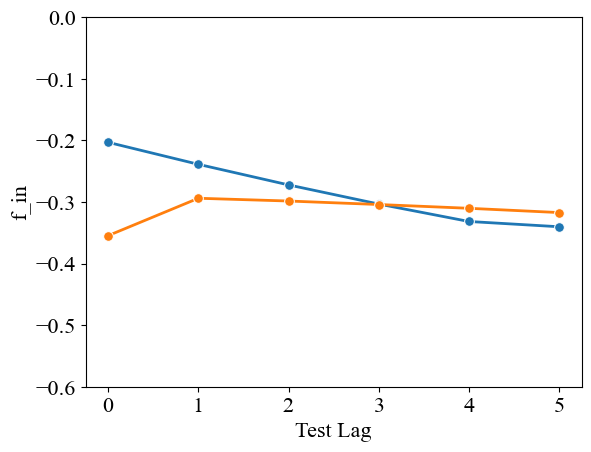

In [34]:
sns.lineplot(data=df_fin, x="lag", y="corr_fin", linewidth=2, marker="o", markersize=7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x="lag", y="omax_fin", linewidth=2, marker="o", markersize=7)
plt.ylim([-0.6, 0])
plt.xlabel("Test Lag")
plt.ylabel("f_in")
plt.show()

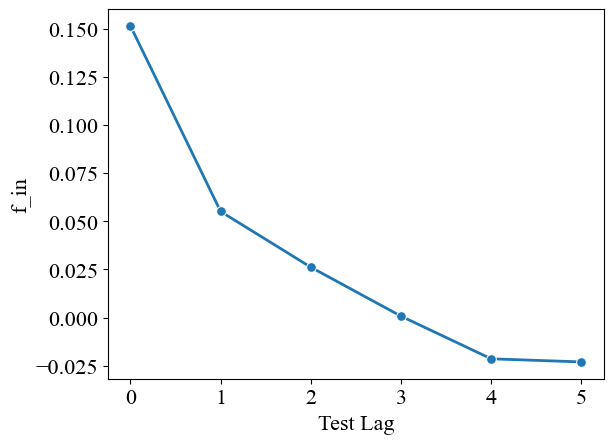

In [35]:
sns.lineplot(data=df_fin, x="lag", y="dif", linewidth=2, marker="o", markersize=7)
# plt.ylim([0,1])
plt.xlabel("Test Lag")
plt.ylabel("f_in")
plt.show()

### Yes rate

In [36]:
# session-wise, calculate correct rate for each lag
df_sess_lag = df_simu.groupby(["session", "lag"]).correct.mean().to_frame(name="correct_rate").reset_index()
df_sess_lag

,session,lag,correct_rate
0,0,0,0.722222
1,0,1,0.562500
2,0,2,0.357143
3,0,3,0.200000
4,0,4,0.166667
...,...,...,...
5995,999,1,0.307692
5996,999,2,0.400000
5997,999,3,0.333333
5998,999,4,0.266667


In [37]:
# collapse across sessions
df_lag = df_sess_lag.groupby("lag").correct_rate.mean().to_frame(name="correct_rate").reset_index()
df_lag

,lag,correct_rate
0,0,0.816559
1,1,0.521817
2,2,0.393576
3,3,0.297290
4,4,0.242221
5,5,0.248406


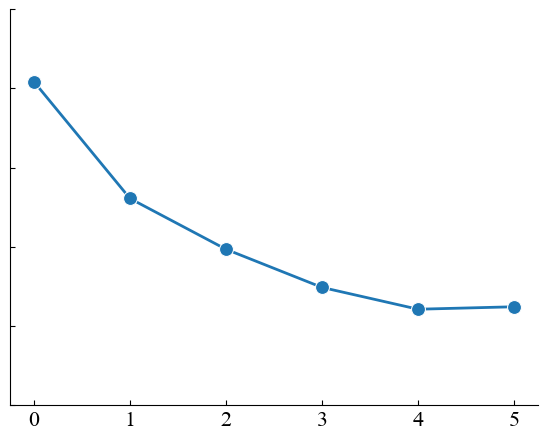

In [38]:
# plot
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_lag, x="lag", y="correct_rate", linewidth=2, marker="o", markersize=10)
plt.ylim([0, 1])
plt.xlabel("Test Lag")
plt.ylabel("Probablility of Recall")

if SAVEFIG:
    ax.set(xlabel=None, ylabel=None)
    plt.tick_params(labelleft=False)
    plt.savefig("simu5_fig/simu5_recall.pdf")